<a href="https://colab.research.google.com/github/LogeswaranSR/PRODIGY_ML_03/blob/main/SVM_Classifier_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c dogs-vs-cats
! unzip dogs-vs-cats.zip
!mkdir ./dogs-vs-cats
!unzip train.zip -d ./dogs-vs-cats
!mkdir ./dogs-vs-cats/test
!unzip test1.zip -d ./dogs-vs-cats/test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from PIL import Image

In [ ]:
def evaluate(model, val_df_X, val_df_y, batch_size=50):
  eval_scores = []
  for i in range(0, len(val_df_y), batch_size):
    sc = model.score(val_df_X[i:i+batch_size], val_df_y[i:i+batch_size])
    eval_scores.append(sc)
  return eval_scores

In [ ]:
im_size = (128, 128)
im_width, im_height = im_size
im_channels = 3
batch_size=20

In [ ]:
import os
path = "./dogs-vs-cats/train"
filenames = os.listdir(path)
imgs = []
categories=[]

for f in filenames:
    cat_or_dog = f.split('.')[0]
    categories.append(0 if cat_or_dog=='cat' else 1)

    img = Image.open(path + '//' + f)
    img = img.resize(im_size)
    img = img.convert('L')
    img = np.array(img).flatten()
    imgs.append(img)

imgs = np.array(imgs)
categories = np.array(categories)

In [ ]:
imgs[:5], categories[:5]

(array([[ 20,  40,  49, ..., 132, 128, 121],
        [236, 245, 250, ...,  54,  46,  45],
        [252, 247, 232, ...,  55,  52,  49],
        [ 74,  51,  45, ...,  94,  58,  54],
        [ 14,  14,  16, ...,  25,  23,  23]], dtype=uint8),
 array([1, 0, 1, 1, 0]))

In [ ]:
image_data = pd.DataFrame(imgs)
image_data.head()

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,20,40,49,58,48,35,37,36,38,39,...,138,133,130,134,134,135,134,132,128,121
1,236,245,250,251,251,252,253,253,253,253,...,44,43,53,61,75,80,67,54,46,45
2,252,247,232,197,179,197,196,191,192,190,...,61,58,57,58,57,56,56,55,52,49
3,74,51,45,39,31,33,31,26,27,29,...,71,68,67,67,49,59,60,94,58,54
4,14,14,16,16,16,16,17,17,17,17,...,24,25,25,25,25,26,26,25,23,23


In [ ]:
train_df_img, val_df_img, train_y, val_y = train_test_split(image_data, categories, test_size=0.2, random_state=42)

In [ ]:
train_y[:5]

array([0, 0, 0, 0, 1])

In [ ]:
train_df_img[:batch_size]

,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
23311,136,135,136,142,145,143,142,143,144,146,...,108,90,72,66,66,54,50,51,58,61
23623,53,51,53,52,53,53,49,50,52,54,...,16,12,13,16,18,20,20,21,25,25
1020,70,74,75,79,87,93,98,104,113,119,...,109,111,110,109,109,108,110,109,108,103
12645,59,55,56,56,55,51,46,43,46,45,...,92,97,100,95,86,86,85,82,78,79
1533,178,171,173,198,232,241,217,179,97,94,...,52,60,67,68,65,59,48,36,58,59
3518,41,41,41,41,41,41,41,41,40,38,...,134,131,130,137,129,119,128,135,130,121
483,111,112,89,103,114,113,116,116,113,83,...,149,147,141,139,140,137,135,136,141,142
19370,208,209,209,210,209,209,210,211,212,212,...,91,92,92,94,95,97,99,95,104,108
12667,143,186,202,198,204,226,230,230,224,224,...,193,189,190,190,195,191,193,197,200,191
7403,45,32,51,56,60,65,68,68,50,48,...,76,79,67,52,53,53,52,48,47,47


In [ ]:
print("Training Data Size:", train_df_img.shape)
print("Validation Data Size:", val_df_img.shape)

Training Data Size: (20000, 16384)
Validation Data Size: (5000, 16384)


In [ ]:
svm_model = SGDClassifier(loss='hinge') # SVM Model with updatable weights per each batch
scores = []
ind=0

In [ ]:
svm_model.fit(train_df_img[:batch_size], train_y[:batch_size])
score = svm_model.score(val_df_img[ind:ind+batch_size], val_y[ind:ind+batch_size])
scores.append(score)
ind = (ind+batch_size)%len(val_y)

In [ ]:
num_epochs=2
for epoch in range(num_epochs):
  for i in range(0, len(train_y), batch_size):
    svm_model.partial_fit(train_df_img[i:i+batch_size], train_y[i:i+batch_size])
    score = svm_model.score(val_df_img[ind:ind+batch_size], val_y[ind:ind+batch_size])
    scores.append(score)
    ind = (ind+batch_size)%len(val_y)

In [ ]:
eval_scores = evaluate(svm_model, val_df_img, val_y)
avg = sum(eval_scores)/len(eval_scores)
print("Evaluation Score (Avg): %.2f" %avg)

Evaluation Score (Avg): 0.51


In [ ]:
len(scores)

2001

In [ ]:
scores_avg = []
for i in range(0, len(scores), 50):
  sample = scores[i:i+50]
  scores_avg.append(sum(sample)/50)
scores_avg.pop()

0.01

In [ ]:
len(scores_avg)

40

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2d71612ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2d71613010>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2d71612830>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2d71613550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2d716137f0>],
 'means': []}

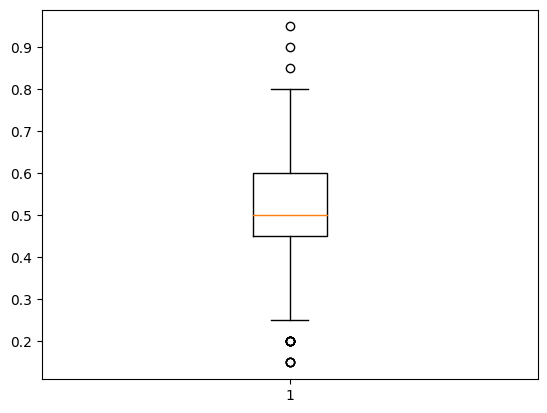

In [ ]:
plt.boxplot(scores)

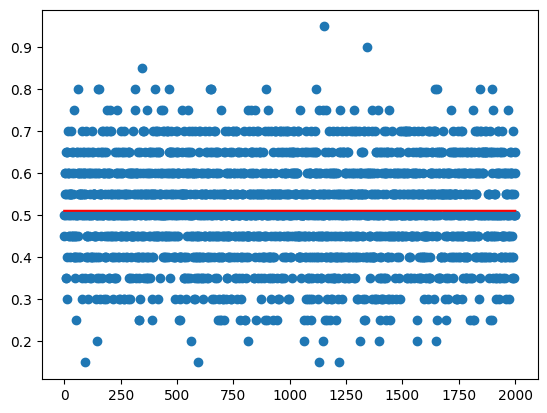

In [ ]:
plt.scatter(range(len(scores)), scores)
plt.plot(range(len(scores)), [sum(scores_avg)/len(scores_avg)]*len(scores), color='r')
plt.show()

## Inference

In [ ]:
test_path = "./dogs-vs-cats/test/test1/"
test_imgs = []
for img_file in os.listdir(test_path)[20:28]:
  img = Image.open(test_path + img_file)
  img = img.resize(im_size)
  img = img.convert('L')
  img = np.array(img).flatten()
  test_imgs.append(img)
test_imgs = np.array(test_imgs)

In [ ]:
preds = svm_model.predict(test_imgs)
preds

array([1, 1, 1, 1, 1, 1, 1, 1])

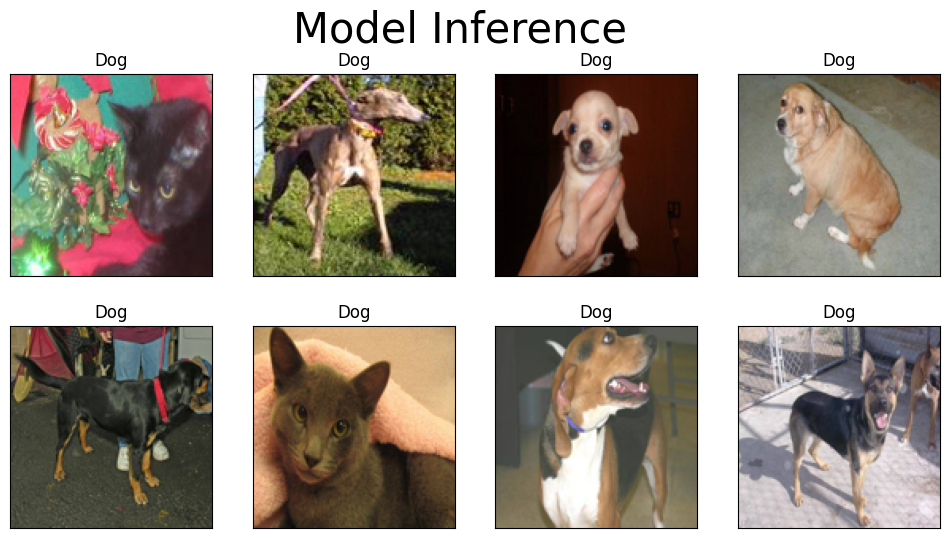

In [ ]:
fig = plt.figure(figsize=(12, 6))
fig.suptitle("Model Inference", size=30)
ind=1
for img in os.listdir(test_path)[20:28]:
  image = Image.open(test_path+img)
  image = image.resize(im_size)
  plt.subplot(2, 4, ind)
  plt.imshow(image)
  plt.title('Cat' if preds[ind-1]==0 else 'Dog')
  plt.xticks([])
  plt.yticks([])
  ind+=1
plt.savefig("SVM Model Inference")
plt.show()

In [ ]:
obj=[svm_model, {'Model Class':'SGDClassifier (SVM)','dataset':'dogs-vs-cats'}]

In [ ]:
import pickle
with open('svm_model.pkl','wb') as model_file:
  pickle.dump(obj, model_file)